# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

In [2]:
# Reading your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetching the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [5]:
# Fetching the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")

In [6]:
# Creating the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Creating a DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...


In [7]:
# Creating the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Creatin a DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]

ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [8]:
# Describing the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.194484,0.003947,0.945316,0.050737
std,0.266427,0.017206,0.077066,0.069277
min,0.000000,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.897500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.075000,1.000000,0.174000


In [9]:
# Describing the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.102920,0.025750,0.916550,0.057700
std,0.299156,0.054482,0.104965,0.076181
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.878000,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.226300,0.011750,1.000000,0.087250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
# Expanding the default stopwords list if necessary

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
#sw = (stopwords.words('english'))
#new_words=('said', 'sent','file','photo', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also','re','name', 'user', 'ct')
#for i in new_words:
#    stopwords.append(i)
#print(stopwords)

sw = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_sw = ['apple','seen','taken', 'said', 'sent','file','photo', 'found', 'including', 
          'representation,''today', 'announced', 'week','illustration', 
          'basically', 'also','re','name', 'user', 'ct']
new_sw_list = sw.union(new_sw)

print(new_sw_list)

{'not', 'the', 'taken', 'into', "it's", 'itself', "don't", 'o', 'once', 're', 'won', 'has', 'its', 'off', 'him', 't', 'are', "hasn't", 'week', "should've", 'shan', 'me', 'herself', 'all', 'don', 'is', 'ain', "aren't", 'very', 'haven', 'as', 'y', 'from', 'doesn', 'll', 'photo', 'user', 'we', 'if', 'our', 'sent', 's', 'were', 'when', 'yourself', 'am', 'be', 'she', 'an', "you'd", 'up', 'and', 'myself', "wouldn't", 'no', 'representation,today', 'against', 'you', 'ct', 'mightn', 'including', 'some', 'wouldn', "hadn't", 'about', 'theirs', 'over', "haven't", 'any', 'nor', 'now', 'ourselves', 'having', "that'll", 'also', 'there', 'my', 'hers', 'who', 'only', "isn't", 'where', 'them', 'few', "you're", 'other', 'yourselves', 'more', 'i', 'had', 'm', 'again', 'under', 'd', 'did', 'couldn', 'both', 'own', 'during', "doesn't", 'that', "didn't", 'been', "weren't", 'announced', 'just', 'your', "needn't", 'wasn', 'this', 'said', 'further', 'illustration', 'while', 'found', 'but', 'with', 'after', 'bet

In [14]:
# Completing the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Creating a list of the words
    new_sw_list#sw = set(stopwords.words('english')) # Remove the stop words
    regex = re.compile("[^a-zA-Z ]")
   
    re_clean = regex.sub(' ', text)
    
    # Remove the punctuation
    words = word_tokenize(re_clean)
    # Converting the words to lowercase
    results = [word.lower() for word in words if word.lower() not in new_sw_list]#sw]
   
    # Remove the stop words
   
    # Lemmatizing Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in results]
    return tokens


In [15]:
# Creating a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)

bitcoin_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, partnered, cryptocurrency, startup, blo..."
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, two, month, ra..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...,"[six, year, launch, mexico, based, crypotcurre..."


In [16]:
# Creating a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generating the Bitcoin N-grams where N=2!
bitcoin_text = bitcoin_df["text"].str.cat()
clean_bitcoin_text =  tokenizer(bitcoin_text)
bigram_counts = Counter(ngrams(clean_bitcoin_text, n=2))
bigram_counts.most_common(20)

[(('virtual', 'currency'), 8),
 (('reuters', 'dado'), 7),
 (('dado', 'ruvic'), 7),
 (('representation', 'virtual'), 5),
 (('currency', 'bitcoin'), 5),
 (('london', 'reuters'), 5),
 (('char', 'reuters'), 4),
 (('reuters', 'staff'), 4),
 (('staff', 'representation'), 4),
 (('ruvic', 'london'), 4),
 (('reuters', 'char'), 4),
 (('char', 'representation'), 3),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3),
 (('digital', 'currency'), 2),
 (('time', 'high'), 2),
 (('bitcoin', 'november'), 2),
 (('november', 'reuters'), 2),
 (('ruvic', 'tokyo'), 2),
 (('tokyo', 'reuters'), 2)]

In [19]:
# Generating the Ethereum N-grams where N=2
ethereum_text = ethereum_df["text"].str.cat()
clean_ethereum_text =  tokenizer(ethereum_text)
bigram_E_counts = Counter(ngrams(clean_ethereum_text, n=2))
bigram_E_counts.most_common(20)

[(('virtual', 'currency'), 9),
 (('reuters', 'dado'), 8),
 (('dado', 'ruvic'), 8),
 (('london', 'reuters'), 7),
 (('char', 'reuters'), 6),
 (('reuters', 'staff'), 6),
 (('staff', 'representation'), 6),
 (('representation', 'virtual'), 6),
 (('currency', 'bitcoin'), 6),
 (('new', 'york'), 5),
 (('november', 'reuters'), 5),
 (('reuters', 'bitcoin'), 5),
 (('ruvic', 'london'), 4),
 (('york', 'reuters'), 4),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3),
 (('reuters', 'char'), 3),
 (('char', 'london'), 3),
 (('char', 'new'), 3),
 (('bitcoin', 'november'), 3)]

In [20]:
# Using the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Getting the top 10 words for Bitcoin
token_count(clean_bitcoin_text, N=10)

[('char', 19),
 ('reuters', 18),
 ('bitcoin', 15),
 ('currency', 10),
 ('representation', 8),
 ('virtual', 8),
 ('dado', 7),
 ('ruvic', 7),
 ('november', 5),
 ('london', 5)]

In [22]:
# Getting the top 10 words for Ethereum
token_count(clean_ethereum_text, N=10)

[('reuters', 26),
 ('char', 20),
 ('bitcoin', 14),
 ('currency', 10),
 ('representation', 9),
 ('virtual', 9),
 ('dado', 8),
 ('ruvic', 8),
 ('london', 7),
 ('new', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

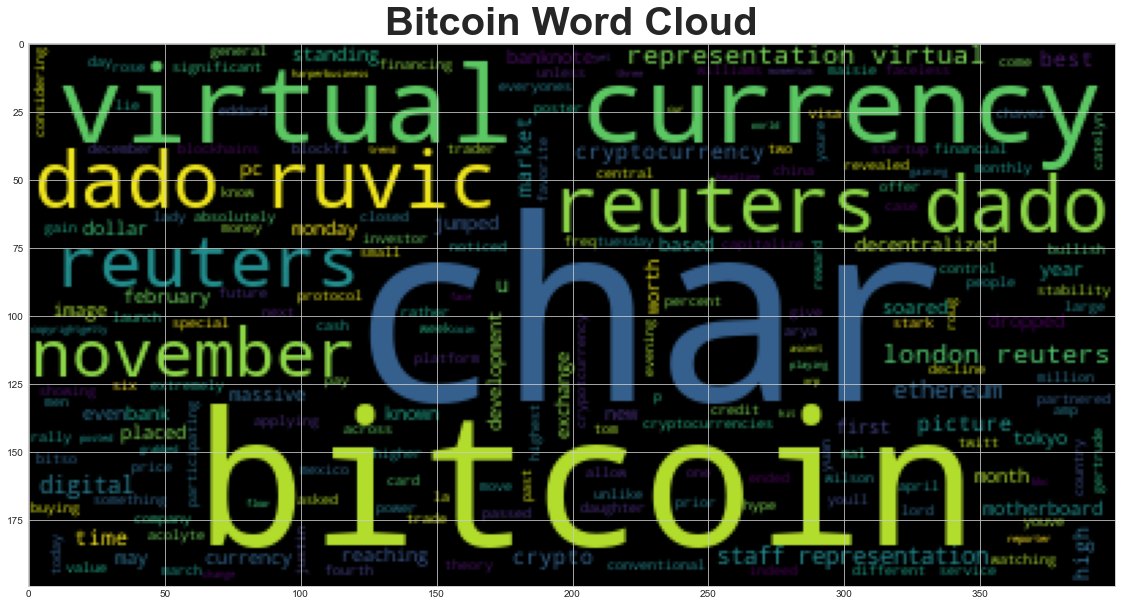

In [24]:
# Generating the Bitcoin word cloud
big_string = ' '.join(clean_bitcoin_text)
wc = WordCloud().generate(big_string)
plt.title("Bitcoin Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

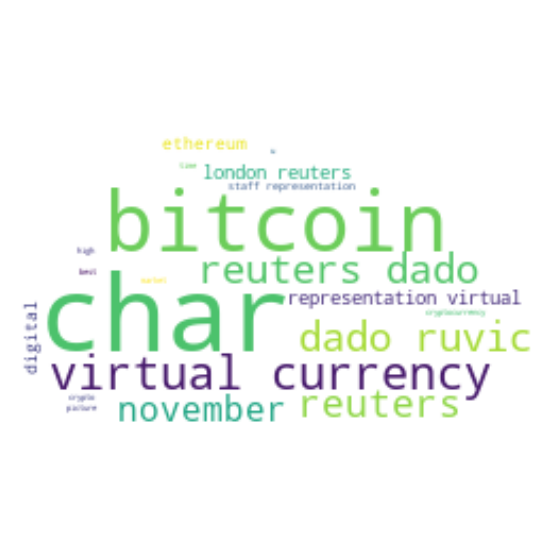

In [25]:
b_mask = np.array(Image.open('cloud_bubble.png'))
b_wordcloud = WordCloud(background_color="white", mask=b_mask).generate(big_string)
plt.figure()
plt.imshow(b_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

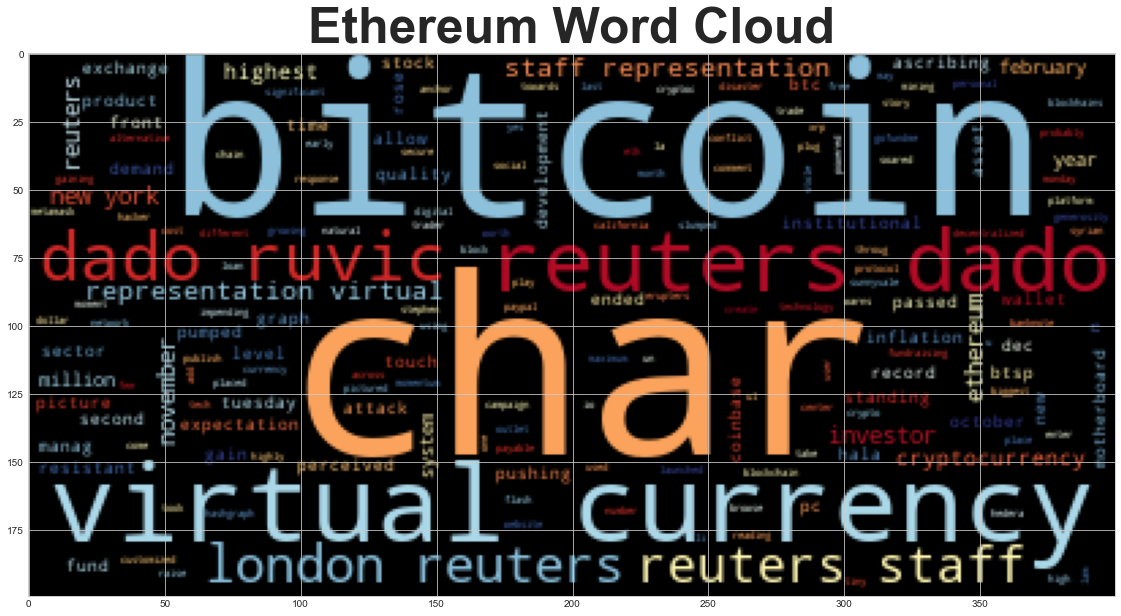

In [26]:
# Generating the Ethereum word cloud
big_string_1 = ' '.join(clean_ethereum_text)
wc = WordCloud(colormap="RdYlBu").generate(big_string_1)
plt.title("Ethereum Word Cloud", fontsize=50, loc="center", fontweight="bold")
plt.imshow(wc)
plt.imshow(wc)

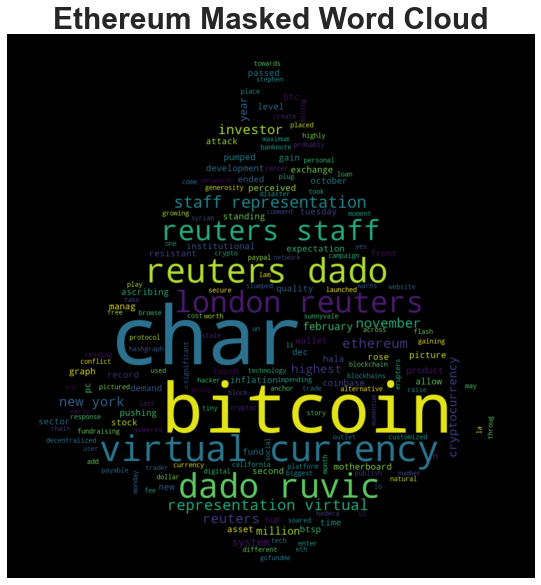

In [27]:
e_mask = np.array(Image.open('ethereum_logo.png'))
e_wordcloud = WordCloud(mask=e_mask).generate(big_string_1)
plt.figure()
plt.imshow(e_wordcloud, interpolation="bilinear")
plt.title("Ethereum Masked Word Cloud", fontsize=30, loc="center", fontweight="bold")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Loading the spaCy model
nlp = spacy.load('en_core_web_sm') #es_core_news_sm

## Bitcoin NER

In [31]:
# Concatenating all of the bitcoin text together
bitcoin_text

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the country more power and, in theory, more stability than freq… [+366 chars]If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]Six years after the launch of the Mexico-based crypotcurrency exchange and financial services platform Bitso the company revealed it has clos

In [32]:
# Running the NER processor on all of the text
doc = nlp(bitcoin_text)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Rendering the visualization
displacy.render(doc, style='ent')

In [34]:
# Listing all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Mexico GPE
$62 million MONEY
chars]4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Justin HarperBusiness ORG
BBC News ORG
Bitcoin GPE
above $17,000 MONEY
12,800 MONEY
three-year DATE
Bitcoin GPE
this week DATE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
February 3, 2018 DAT

---

## Ethereum NER

In [35]:
# Concatenating all of the bitcoin text together
ethereum_text

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the se

In [36]:
# Running the NER processor on all of the text
doc_1 = nlp(ethereum_text)
# Add a title to the document
doc_1.user_data["title"] = "Ethereum NER"

In [37]:
# Rendering the visualization
displacy.render(doc_1, style='ent')

In [38]:
# Listing all Entities
for ent in doc_1.ents:
    print(ent.text, ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Hedera ORG
Syrians NORP
Hala Systems ORG
Bitcoin GPE
the Plug and Play Tech Center ORG
Sunnyvale GPE
Californi